In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 8))

# Data Aggregation and Group Operations

## GroupBy Mechanics

In [2]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.859285,-1.198703
1,a,two,0.636399,-0.195889
2,b,one,0.895190,0.996350
3,b,two,-0.818407,0.509639
4,a,one,0.581754,-0.227383


In [4]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [5]:
grouped.mean()

key1
a    0.471298
b    0.620205
Name: data1, dtype: float64

In [6]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     1.302484
      two    -1.191073
b     one    -0.092621
      two     1.333032
Name: data1, dtype: float64

In [7]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

any missing values in a group key will be excluded from the result

### Iterating Over Groups

In [8]:
for name, group in df.groupby('key1',axis=0):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.866135 -1.111003
1    a  two -1.191073 -0.851603
4    a  one  1.738832  0.840804
b
  key1 key2     data1     data2
2    b  one -0.092621 -0.055146
3    b  two  1.333032 -1.273207


In [9]:
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.866135 -1.111003
4    a  one  1.738832  0.840804
('a', 'two')
  key1 key2     data1     data2
1    a  two -1.191073 -0.851603
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.092621 -0.055146
('b', 'two')
  key1 key2     data1     data2
3    b  two  1.333032 -1.273207


In [3]:
pieces = list(df.groupby('key1'))

In [4]:
pieces[0]

('a',
   key1 key2     data1     data2
 0    a  one -0.859285 -1.198703
 1    a  two  0.636399 -0.195889
 4    a  one  0.581754 -0.227383)

In [11]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [12]:
grouped = df.groupby(df.dtypes, axis=1)

In [13]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  0.866135 -1.111003
1 -1.191073 -0.851603
2 -0.092621 -0.055146
3  1.333032 -1.273207
4  1.738832  0.840804
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a Column or Subset of Columns

In [14]:
df[['data2']].groupby([df['key1'],df['key2']]).mean()

data2
key1 key2          
a    one  -0.135100
     two  -0.851603
b    one  -0.055146
     two  -1.273207

In [15]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.135100
     two  -0.851603
b    one  -0.055146
     two  -1.273207

### Grouping with Dicts and Series

In [16]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,1.455968,-0.252676,0.440074,-0.495408,1.004837
Steve,1.541150,0.823764,-0.706520,0.642319,-0.247006
Wes,0.375935,NaN,NaN,-0.378295,-0.157542
Jim,1.270208,0.376610,1.397058,-1.040542,0.001566
Travis,-0.426547,-1.781168,0.018283,0.072928,0.039495


In [17]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [18]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,-0.055334,2.208130
Steve,-0.064201,2.117909
Wes,-0.378295,0.218393
Jim,0.356516,1.648384
Travis,0.091211,-2.168221


In [19]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [20]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with functions

In [21]:
people.groupby(len).sum()

,a,b,c,d,e
3,3.102112,0.123934,1.837132,-1.914245,0.848861
5,1.541150,0.823764,-0.706520,0.642319,-0.247006
6,-0.426547,-1.781168,0.018283,0.072928,0.039495


In [22]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.375935 -0.252676  0.440074 -0.495408 -0.157542
  two  1.270208  0.376610  1.397058 -1.040542  0.001566
5 one  1.541150  0.823764 -0.706520  0.642319 -0.247006
6 two -0.426547 -1.781168  0.018283  0.072928  0.039495

### Grouping by Index Levels

In [23]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.147719 -0.609186 -1.013586  1.389103  0.752312
1      0.298991 -1.344625 -1.190037  1.074069 -0.624140
2     -0.324379 -1.632273  0.822898  0.326586  1.682948
3     -1.471788 -0.640038  0.536224  0.732293  0.886635

In [24]:
hier_df.groupby(level='cty',axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## Data Aggregation

In [25]:
grouped = df.groupby('key1')
for name,group in grouped:
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.866135 -1.111003
1    a  two -1.191073 -0.851603
4    a  one  1.738832  0.840804
b
  key1 key2     data1     data2
2    b  one -0.092621 -0.055146
3    b  two  1.333032 -1.273207


In [26]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)                       # DataFrameGroupBy.agg(func)

,data1,data2
key1,,
a,2.929905,1.951807
b,1.425652,1.218061


In [27]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.471298  1.504330 -1.191073 -0.162469  0.866135  1.302484   
b      2.0  0.620205  1.008088 -0.092621  0.263792  0.620205  0.976619   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.738832   3.0 -0.373934  1.059959 -1.111003 -0.981303 -0.851603   
b     1.333032   2.0 -0.664176  0.861299 -1.273207 -0.968692 -0.664176   

                          
           75%       max  
key1                      
a    -0.005400  0.840804  
b    -0.359661 -0.055146

### Column-Wise and Multiple Function Application

In [28]:
tips = pd.read_csv('examples/tips.csv')

In [29]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:5]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [30]:
grouped = tips.groupby(['day','smoker'])
grouped_pct = grouped[['tip_pct']]

In [31]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

tip_pct                       
                 mean       std peak_to_peak
day  smoker                                 
Fri  No      0.151650  0.028123     0.067349
     Yes     0.174783  0.051293     0.159925
Sat  No      0.158048  0.039767     0.235193
     Yes     0.147906  0.061375     0.290095
Sun  No      0.160113  0.042347     0.193226
     Yes     0.187250  0.154134     0.644685
Thur No      0.160298  0.038774     0.193350
     Yes     0.163863  0.039389     0.151240

In [32]:
grouped_pct.agg([('foo', 'mean'), ('bar', 'std')])

tip_pct          
                  foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [33]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

<ipython-input-33-417b40324039>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [34]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [35]:
grouped = tips.groupby(['day','smoker'], as_index=False)
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

day smoker   tip_pct                               size
                     min       max      mean       std  sum
0   Fri     No  0.120385  0.187735  0.151650  0.028123    9
1   Fri    Yes  0.103555  0.263480  0.174783  0.051293   31
2   Sat     No  0.056797  0.291990  0.158048  0.039767  115
3   Sat    Yes  0.035638  0.325733  0.147906  0.061375  104
4   Sun     No  0.059447  0.252672  0.160113  0.042347  167
5   Sun    Yes  0.065660  0.710345  0.187250  0.154134   49
6  Thur     No  0.072961  0.266312  0.160298  0.038774  112
7  Thur    Yes  0.090014  0.241255  0.163863  0.039389   40

## Apply: General split-apply-combine

In [36]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [37]:
tips.groupby('smoker').apply(top)

#The function is called on each row group from the DataFrame, and then the results 
#are glued together using pandas.concat, labeling the pieces with the group names

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

If you pass a function to apply that takes other arguments or keywords, you can pass
these after the function

In [38]:
tips.groupby(['day', 'time']).apply(top, n=2, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
day  time                                                              
Fri  Dinner 90        28.97   3.00    Yes   Fri  Dinner     2  0.103555
            95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
     Lunch  223       15.98   3.00     No   Fri   Lunch     3  0.187735
            225       16.27   2.50    Yes   Fri   Lunch     2  0.153657
Sat  Dinner 212       48.33   9.00     No   Sat  Dinner     4  0.186220
            170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
Sun  Dinner 182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
            156       48.17   5.00     No   Sun  Dinner     6  0.103799
Thur Dinner 243       18.78   3.00     No  Thur  Dinner     2  0.159744
     Lunch  142       41.19   5.00     No  Thur   Lunch     5  0.121389
            197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

### Suppressing the Group Keys

In [39]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### Quantile and Bucket Analysis

In [40]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})

In [41]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:4]

0    (-1.617, -0.0603]
1     (-0.0603, 1.497]
2     (-0.0603, 1.497]
3     (-0.0603, 1.497]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.18, -1.617] < (-1.617, -0.0603] < (-0.0603, 1.497] < (1.497, 3.053]]

In [42]:
grouped = frame.data2.groupby(quartiles)

In [43]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
    'count': group.count(), 'mean': group.mean()}

In [44]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.18, -1.617]",-2.533927,2.368238,59.0,0.016148
"(-1.617, -0.0603]",-2.764883,2.557878,446.0,0.004248
"(-0.0603, 1.497]",-3.384632,2.687265,419.0,-0.077924
"(1.497, 3.053]",-2.730007,2.100024,76.0,-0.079469


In [45]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.533927,2.408472,100.0,-0.049859
1,-2.616350,2.021135,100.0,0.078196
2,-2.764883,2.557878,100.0,-0.066801
3,-2.110981,2.331379,100.0,-0.051044
4,-2.466287,2.408248,100.0,0.096001
5,-2.779103,2.350670,100.0,-0.069218
6,-3.384632,2.687265,100.0,-0.007172
7,-2.641416,2.498642,100.0,-0.042668
8,-2.541184,2.389395,100.0,-0.160299


### Example: Filling Missing Values with Group-Specific Values

In [46]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio          1.063975
New York     -0.079750
Vermont       0.219930
Florida      -0.027829
Oregon       -0.002295
Nevada       -0.517272
California    0.242436
Idaho         0.821075
dtype: float64

In [47]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          1.063975
New York     -0.079750
Vermont            NaN
Florida      -0.027829
Oregon       -0.002295
Nevada             NaN
California    0.242436
Idaho              NaN
dtype: float64

In [48]:
data.groupby(group_key).mean()

East    0.318799
West    0.120070
dtype: float64

In [49]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          1.063975
New York     -0.079750
Vermont       0.318799
Florida      -0.027829
Oregon       -0.002295
Nevada        0.120070
California    0.242436
Idaho         0.120070
dtype: float64

In [50]:
fill_values = {'East': 0.5, 'West': -1}
fill_values['East']

0.5

In [51]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [52]:
data.groupby(group_key).apply(fill_func)

Ohio          1.063975
New York     -0.079750
Vermont       0.500000
Florida      -0.027829
Oregon       -0.002295
Nevada       -1.000000
California    0.242436
Idaho        -1.000000
dtype: float64

### Example: Random Sampling and Permutation

In [53]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [54]:
def draw(deck, n=5):
    return deck.sample(n)                     # Series.sample(n=...)

In [55]:
draw(deck)

10C    10
10H    10
QC     10
JS     10
2D      2
dtype: int64

In [56]:
#two random cards from each suit
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n=2)

C  5C      5
   QC     10
D  10D    10
   5D      5
H  2H      2
   AH      1
S  KS     10
   4S      4
dtype: int64

### Example: Group Weighted Average and Correlation

In [57]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,0.386120,0.326175
1,a,-0.990212,0.249300
2,a,0.952414,0.934574
3,a,0.123449,0.672354
4,b,-0.484074,0.696906
5,b,-0.312734,0.502695
6,b,0.180968,0.226578
7,b,0.088955,0.873428


In [58]:
grouped = df.groupby('category')

In [59]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [60]:
grouped.apply(get_wavg)

category
a    0.390480
b   -0.163447
dtype: float64

In [61]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [62]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [63]:
rets = close_px.pct_change().dropna()
rets[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974
2011-10-14,0.033225,0.003311,0.022784,0.017380


In [64]:
get_year = lambda d: d.year

In [65]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [66]:
by_year = rets.groupby(get_year)

In [67]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [68]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-Wise Linear Regression

## Pivot Tables and Cross-Tabulation

Returning to the tipping dataset, suppose you wanted to compute a table of group
means (the default pivot_table aggregation type) arranged by day and smoker on
the rows

In [69]:
tips.pivot_table(index=['day', 'smoker'])    #df.pivot_table()

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [70]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [71]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],   # margins=
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

Here, the All values are means without taking into account smoker versus nonsmoker
(the All columns) or any of the two levels of grouping on the rows (the All
row)

In [72]:
tips.pivot_table('tip_pct', index=['time', 'smoker'],   # aggfunc=
                 columns='day', aggfunc = 'count', margins=True, fill_value = 0)

day            Fri  Sat  Sun  Thur  All
time   smoker                          
Dinner No        3   45   57     1  106
       Yes       9   42   19     0   70
Lunch  No        1    0    0    44   45
       Yes       6    0    0    17   23
All             19   87   76    62  244

### Cross-Tabulations: Crosstab

A cross-tabulation (or crosstab for short) is a special case of a pivot table that computes
group frequencies.

In [73]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)    # pd.crosstab()

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# Time Series

## Date and Time Data Types and Tools

In [74]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2021, 8, 3, 11, 47, 58, 128007)

In [75]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [76]:
from datetime import timedelta
start = datetime(2011, 1, 7)

In [77]:
start+timedelta(10)

datetime.datetime(2011, 1, 17, 0, 0)

In [78]:
start - 2*timedelta(10)

datetime.datetime(2010, 12, 18, 0, 0)

#### Types in datetime module: Python for Data Analysis, page 319

### Converting Between String and Datetime

In [79]:
stamp = datetime(2011, 1, 3)

In [80]:
str(stamp)                          # str(dt)

'2011-01-03 00:00:00'

In [81]:
stamp.strftime('%Y-%m-%d')          # dt.strftime('...')

'2011-01-03'

#### Datetime format specification (ISO C89 compatible): Python for Data Analysis, page 319

In [82]:
value = '2011-01-03'

In [83]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [84]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

However, it
can be a bit annoying to have to write a format spec each time, especially for common
date formats. In this case, you can use the parser.parse method in the third-party
dateutil package

In [85]:
from dateutil.parser import parse

In [86]:
parse('2011-01-03')                                # parse()

datetime.datetime(2011, 1, 3, 0, 0)

In [87]:
parse('7/6/2011')

datetime.datetime(2011, 7, 6, 0, 0)

In [88]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [89]:
parse('6/12/2011', dayfirst=True)          # dayfirst=True

datetime.datetime(2011, 12, 6, 0, 0)

In [90]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)                                          # pd.to_datetime()

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [91]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [92]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [93]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [94]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.015621
2011-01-05    0.420593
2011-01-07   -0.166817
2011-01-08    1.282344
2011-01-10    2.920824
2011-01-12    1.662535
dtype: float64

In [95]:
ts.index.dtype

dtype('<M8[ns]')

In [96]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [97]:
stamp = ts.index[2]
ts[stamp]

-0.16681681984363966

In [98]:
ts[2]

-0.16681681984363966

In [99]:
ts['1/10/2011']

2.9208241735031293

In [100]:
ts['20110110']

2.9208241735031293

In [101]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))     

In [102]:
longer_ts.tail()

2002-09-22   -0.047713
2002-09-23    0.052041
2002-09-24   -0.612595
2002-09-25    0.471688
2002-09-26    0.161287
Freq: D, dtype: float64

For longer time series, a year or only a year and month can be passed to easily select
slices of data

In [103]:
longer_ts['2001'].tail()

2001-12-27   -1.273955
2001-12-28    0.286267
2001-12-29   -0.353901
2001-12-30    0.312201
2001-12-31   -2.071355
Freq: D, dtype: float64

In [104]:
longer_ts['2001-03'].head()

2001-03-01   -0.142411
2001-03-02    0.226597
2001-03-03   -0.501912
2001-03-04   -0.792510
2001-03-05   -0.921957
Freq: D, dtype: float64

In [105]:
# Slicing with datetime objects
ts[datetime(2011, 1, 7):]

2011-01-07   -0.166817
2011-01-08    1.282344
2011-01-10    2.920824
2011-01-12    1.662535
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps
not contained in a time series to perform a range query

In [106]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.166817
2011-01-08    1.282344
2011-01-10    2.920824
dtype: float64

In [107]:
ts.truncate(after='1/9/2011')                   # ts.truncate(after = '') slices a Series between two dates

2011-01-02    1.015621
2011-01-05    0.420593
2011-01-07   -0.166817
2011-01-08    1.282344
dtype: float64

In [108]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates,
                       columns=['Colorado', 'Texas','New York', 'Ohio'])
long_df.loc['2001-03']

,Colorado,Texas,New York,Ohio
2001-03-07,1.507800,-0.114165,-1.214090,1.169965
2001-03-14,1.931105,1.185545,-0.902048,1.147503
2001-03-21,-1.456561,-0.711095,-1.083246,0.600866
2001-03-28,0.455030,0.678196,0.940738,-0.138175


## Date Ranges, Frequencies, and Shifting

### Generating Date Ranges

In [109]:
pd.date_range('2012-04-01', '2012-05-01')                        # pd.date_range()

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01'],
              dtype='datetime64[ns]', freq='D')

In [110]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [111]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [112]:
# last Business day of each Month
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

#### Base time series frequencies: Python for Data Analysis, page 329

date_range by default preserves the time (if any) of the start or end timestamp:

In [113]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [114]:
#normalize
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [115]:
from pandas.tseries.offsets import Hour, Minute

In [116]:
hour = Hour()
hour

<Hour>

In [117]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In most applications, you would never need to explicitly create one of these objects,
instead using a string alias like 'H' or '4H'. Putting an integer before the base frequency
creates a multiple

In [118]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [119]:
Hour(2) + Minute(30)

<150 * Minutes>

In [120]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [121]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') # every 3rd Friday 
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [122]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [123]:
ts

2000-01-31    1.076194
2000-02-29   -0.221375
2000-03-31    3.267130
2000-04-30    0.656943
Freq: M, dtype: float64

In [124]:
ts.shift(2)                    # ts.shift()

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.076194
2000-04-30   -0.221375
Freq: M, dtype: float64

In [125]:
ts.shift(-2)

2000-01-31    3.267130
2000-02-29    0.656943
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [126]:
ts.shift(2, freq='M')

2000-03-31    1.076194
2000-04-30   -0.221375
2000-05-31    3.267130
2000-06-30    0.656943
Freq: M, dtype: float64

In [127]:
ts.shift(3, freq='D')

2000-02-03    1.076194
2000-03-03   -0.221375
2000-04-03    3.267130
2000-05-03    0.656943
dtype: float64

In [128]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.076194
2000-02-29 01:30:00   -0.221375
2000-03-31 01:30:00    3.267130
2000-04-30 01:30:00    0.656943
dtype: float64

In [129]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [130]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [131]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [132]:
offset = MonthEnd()
offset.rollforward(now)            # offset

Timestamp('2011-11-30 00:00:00')

In [133]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

A creative use of date offsets is to use these methods with groupby 

In [134]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='5d'))
ts

2000-01-15   -1.859906
2000-01-20    0.590602
2000-01-25    0.660119
2000-01-30   -0.635491
2000-02-04   -1.779498
2000-02-09   -0.720111
2000-02-14    1.383772
2000-02-19    0.659174
2000-02-24    0.465436
2000-02-29    0.097467
2000-03-05    1.623863
2000-03-10    1.220015
2000-03-15    1.542633
2000-03-20    1.427187
2000-03-25    1.017273
2000-03-30   -0.968505
2000-04-04    0.068946
2000-04-09   -0.816432
2000-04-14   -1.396308
2000-04-19    0.353824
Freq: 5D, dtype: float64

In [135]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.311169
2000-02-29    0.017707
2000-03-31    0.977078
2000-04-30   -0.447493
dtype: float64

## Time Zone Handling

In [136]:
import pytz

In [137]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [138]:
# Timezone object
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [139]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -3.474225
2012-03-10 09:30:00   -0.926703
2012-03-11 09:30:00    0.093917
2012-03-12 09:30:00    0.875721
2012-03-13 09:30:00    1.224926
2012-03-14 09:30:00   -1.453028
Freq: D, dtype: float64

In [140]:
print(ts.index.tz)

None


In [141]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [142]:
ts_utc = ts.tz_localize('UTC')               # ts.tz_localize('')
ts_utc

2012-03-09 09:30:00+00:00   -3.474225
2012-03-10 09:30:00+00:00   -0.926703
2012-03-11 09:30:00+00:00    0.093917
2012-03-12 09:30:00+00:00    0.875721
2012-03-13 09:30:00+00:00    1.224926
2012-03-14 09:30:00+00:00   -1.453028
Freq: D, dtype: float64

Once a time series has been localized to a particular time zone, it can be converted to
another time zone with tz_convert

In [143]:
ts_utc.tz_convert('America/New_York')        # ts.tz_convert('')

2012-03-09 04:30:00-05:00   -3.474225
2012-03-10 04:30:00-05:00   -0.926703
2012-03-11 05:30:00-04:00    0.093917
2012-03-12 05:30:00-04:00    0.875721
2012-03-13 05:30:00-04:00    1.224926
2012-03-14 05:30:00-04:00   -1.453028
Freq: D, dtype: float64

In [144]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−Aware Timestamp Objects

Time zone–aware Timestamp objects internally store a UTC timestamp value as nanoseconds
since the Unix epoch (January 1, 1970); this UTC value is invariant between
time zone conversions

In [145]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

In [146]:
stamp_utc.value

1299902400000000000

In [147]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

### Operations Between Different Time Zones

In [148]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.565255
2012-03-08 09:30:00   -0.399988
2012-03-09 09:30:00   -0.050556
2012-03-12 09:30:00   -0.843220
2012-03-13 09:30:00   -0.952168
2012-03-14 09:30:00   -0.974450
2012-03-15 09:30:00   -0.089480
2012-03-16 09:30:00   -1.293648
2012-03-19 09:30:00    0.317266
2012-03-20 09:30:00    0.612420
Freq: B, dtype: float64

If two time series with different time zones are combined, the result will be UTC

In [149]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

### Periods and Period Arithmetic

In [150]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In this case, the Period object represents the full timespan from January 1, 2007, to
December 31, 2007, inclusive

In [151]:
p+5

Period('2012', 'A-DEC')

If two periods have the same frequency, their difference is the number of units
between them

In [152]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [153]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [154]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [155]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.715237
2000-02   -0.158157
2000-03   -1.246769
2000-04    0.621294
2000-05   -0.346173
2000-06    0.175873
Freq: M, dtype: float64

### Period Frequency Conversion

In [156]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [157]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [158]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [159]:
p = pd.Period('2007', freq='A-JUN')

In [160]:
p

Period('2007', 'A-JUN')

For a fiscal year ending on a month other than December, the corresponding
monthly subperiods are different

In [161]:
p.asfreq('M', how='start')

Period('2006-07', 'M')

In [162]:
p.asfreq('M', how='end')

Period('2007-06', 'M')

When you are converting from high to low frequency, pandas determines the superperiod
depending on where the subperiod “belongs.” For example, in A-JUN frequency,
the month Aug-2007 is actually part of the 2008 period

In [163]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [164]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.384955
2007   -1.742183
2008   -0.115048
2009   -1.064251
Freq: A-DEC, dtype: float64

In [165]:
ts.asfreq('M', how='start')

2006-01    0.384955
2007-01   -1.742183
2008-01   -0.115048
2009-01   -1.064251
Freq: M, dtype: float64

In [166]:
ts.asfreq('B', how='end')

2006-12-29    0.384955
2007-12-31   -1.742183
2008-12-31   -0.115048
2009-12-31   -1.064251
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [167]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [168]:
p

Period('2012Q4', 'Q-JAN')

In [169]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [170]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [171]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [172]:
# second-to-last business day of the quarter
new_rng = (rng.asfreq('B', 'end') - 1).asfreq('T', 'start') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

In [173]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.022853
2000-02-29   -1.545234
2000-03-31    0.050725
Freq: M, dtype: float64

In [174]:
pts = ts.to_period()                  # ts.to_period()
pts

2000-01    0.022853
2000-02   -1.545234
2000-03    0.050725
Freq: M, dtype: float64

In [175]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.182015
2000-01-30   -1.955704
2000-01-31   -0.005604
2000-02-01    1.057688
2000-02-02   -0.427803
2000-02-03    1.831690
Freq: D, dtype: float64

In [176]:
ts2.to_period('M')

2000-01    0.182015
2000-01   -1.955704
2000-01   -0.005604
2000-02    1.057688
2000-02   -0.427803
2000-02    1.831690
Freq: M, dtype: float64

In [177]:
pts = ts2.to_period()
pts

2000-01-29    0.182015
2000-01-30   -1.955704
2000-01-31   -0.005604
2000-02-01    1.057688
2000-02-02   -0.427803
2000-02-03    1.831690
Freq: D, dtype: float64

In [178]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.182015
2000-01-30 23:59:59.999999999   -1.955704
2000-01-31 23:59:59.999999999   -0.005604
2000-02-01 23:59:59.999999999    1.057688
2000-02-02 23:59:59.999999999   -0.427803
2000-02-03 23:59:59.999999999    1.831690
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [179]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [180]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [181]:
data.index=index

In [182]:
data.unemp

1959Q1    5.8
1959Q2    5.1
1959Q3    5.3
1959Q4    5.6
1960Q1    5.2
         ... 
2008Q3    6.0
2008Q4    6.9
2009Q1    8.1
2009Q2    9.2
2009Q3    9.6
Freq: Q-DEC, Name: unemp, Length: 203, dtype: float64

## Resampling and Frequency Conversion

Aggregating higher frequency data to lower frequency is called downsampling,
while converting lower frequency to higher frequency is called upsampling.

pandas objects are equipped with a resample method, which is the workhorse function
for all frequency conversion. resample has a similar API to groupby; you call
resample to group the data, then call an aggregation function

In [183]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.179885
2000-01-02   -0.135626
2000-01-03   -1.021896
2000-01-04    0.354084
2000-01-05    0.297829
                ...   
2000-04-05    0.704220
2000-04-06    1.980648
2000-04-07    1.942273
2000-04-08   -1.415410
2000-04-09   -0.180355
Freq: D, Length: 100, dtype: float64

In [184]:
ts.resample('M').mean()              # ts.resample()

2000-01-31   -0.084730
2000-02-29   -0.129973
2000-03-31    0.269061
2000-04-30    0.186455
Freq: M, dtype: float64

In [185]:
ts.resample('M', kind='period').mean()

2000-01   -0.084730
2000-02   -0.129973
2000-03    0.269061
2000-04    0.186455
Freq: M, dtype: float64

#### Resample method arguments: Python for Data Analysis, page 349

### Downsampling

In [186]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [187]:
ts.resample('5min', closed='right').sum()     #closed

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [188]:
ts.resample('5min', closed='right', label='right').sum()    #label

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [189]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()   #loffset      

<ipython-input-189-ba2eb7585fd2>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()   #loffset


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### Open-High-Low-Close (OHLC) resampling

In finance, a popular way to aggregate a time series is to compute four values for each
bucket: the first (open), last (close), maximum (high), and minimal (low) values

In [190]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [191]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-12,1.696090,0.078729,-1.144966,0.124062


In [192]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.696090,0.078729,-1.144966,0.124062


In [193]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-06,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-07,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-08,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-09,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-10,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-11,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-12,1.696090,0.078729,-1.144966,0.124062


In [194]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-06,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-07,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.696090,0.078729,-1.144966,0.124062


In [195]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-2.216545,-0.815008,-0.493548,-1.921278
2000-01-13,1.696090,0.078729,-1.144966,0.124062


### Resampling with Periods(на повтор)

In [196]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'), 
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,0.224761,-0.427831,0.690431,2.003993
2000-02,0.753158,0.541714,0.330584,-0.742579
2000-03,1.754901,0.977889,-0.680180,-0.311970
2000-04,-1.151836,-0.364990,0.293194,1.069196
2000-05,-0.368432,1.826277,1.039634,-1.006416


In [197]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.326549,0.051028,-0.089138,0.090430
2001,-0.254850,-0.131896,-0.109340,0.120717


In [198]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.326549,0.051028,-0.089138,0.090430
2000Q2,0.326549,0.051028,-0.089138,0.090430
2000Q3,0.326549,0.051028,-0.089138,0.090430
2000Q4,0.326549,0.051028,-0.089138,0.090430
2001Q1,-0.254850,-0.131896,-0.109340,0.120717
2001Q2,-0.254850,-0.131896,-0.109340,0.120717
2001Q3,-0.254850,-0.131896,-0.109340,0.120717
2001Q4,-0.254850,-0.131896,-0.109340,0.120717


In [199]:
annual_frame.resample('Q-DEC', convention='end').ffill()          #convention

,Colorado,Texas,New York,Ohio
2000Q4,0.326549,0.051028,-0.089138,0.090430
2001Q1,0.326549,0.051028,-0.089138,0.090430
2001Q2,0.326549,0.051028,-0.089138,0.090430
2001Q3,0.326549,0.051028,-0.089138,0.090430
2001Q4,-0.254850,-0.131896,-0.109340,0.120717


In [200]:
annual_frame.resample('Q-MAR').ffill()       

,Colorado,Texas,New York,Ohio
2000Q4,0.326549,0.051028,-0.089138,0.090430
2001Q1,0.326549,0.051028,-0.089138,0.090430
2001Q2,0.326549,0.051028,-0.089138,0.090430
2001Q3,0.326549,0.051028,-0.089138,0.090430
2001Q4,-0.254850,-0.131896,-0.109340,0.120717
2002Q1,-0.254850,-0.131896,-0.109340,0.120717
2002Q2,-0.254850,-0.131896,-0.109340,0.120717
2002Q3,-0.254850,-0.131896,-0.109340,0.120717


## Moving Window Functions

In [201]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [202]:
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


Rolling is an operator, which behaves similarly to resample and
groupby. It can be called on a Series or DataFrame along with a window

<AxesSubplot:>

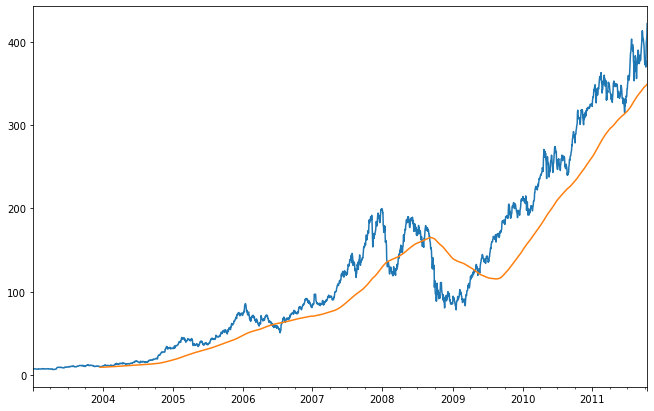

In [203]:
fig=plt.figure(figsize=(11,7))
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()                  # .rolling()

The expression rolling(250) is similar in behavior to groupby, but instead of grouping
it creates an object that enables grouping over a 250-day sliding window. So here
we have the 250-day moving window average of Apple’s stock price.

In [204]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()     

In [205]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

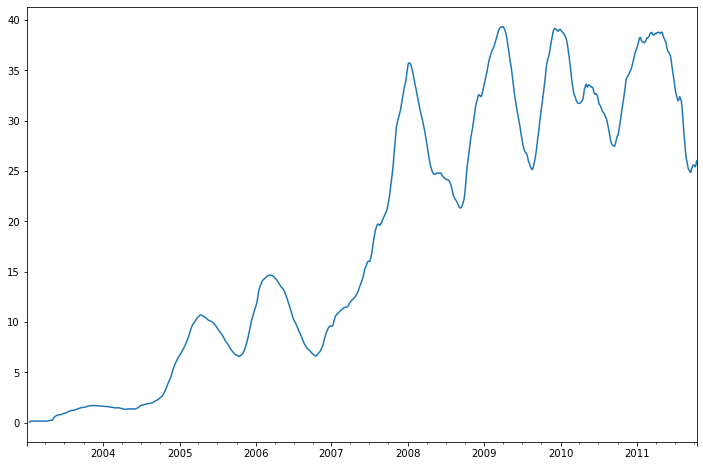

In [206]:
appl_std250.plot()

In order to compute an expanding window mean, use the expanding operator instead
of rolling. The expanding mean starts the time window from the beginning of the
time series and increases the size of the window until it encompasses the whole series.

<AxesSubplot:>

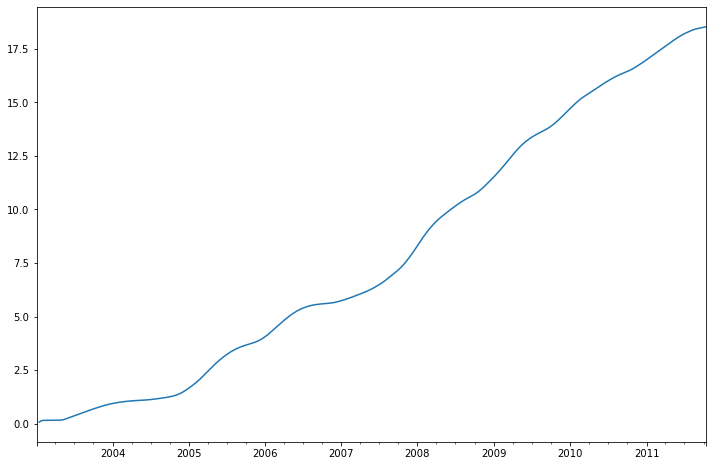

In [207]:
expanding_mean = appl_std250.expanding().mean()           # .expanding()
expanding_mean.plot()

Calling a moving window function on a DataFrame applies the transformation to
each column

<AxesSubplot:>

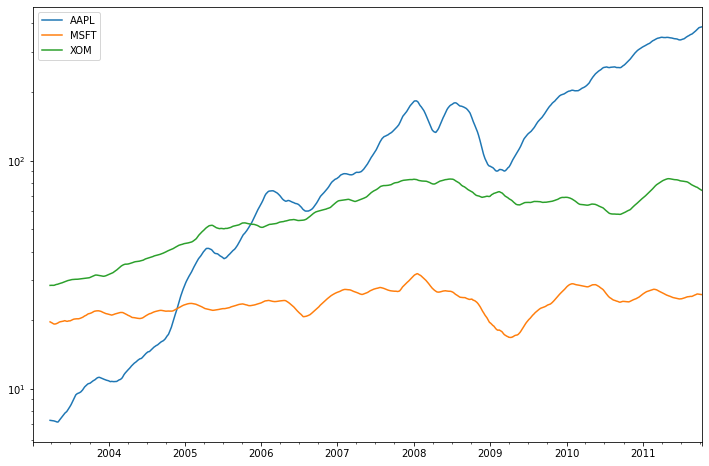

In [208]:
close_px.rolling(60).mean().plot(logy=True)

In [209]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


In [210]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [211]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()                # .ewm()

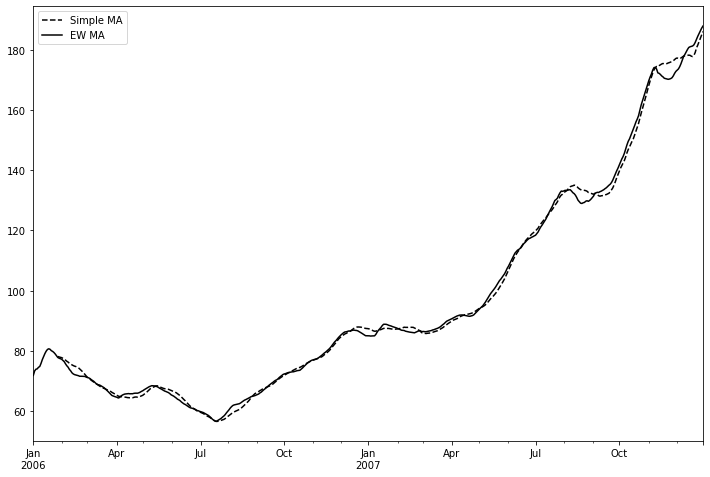

In [212]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [213]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

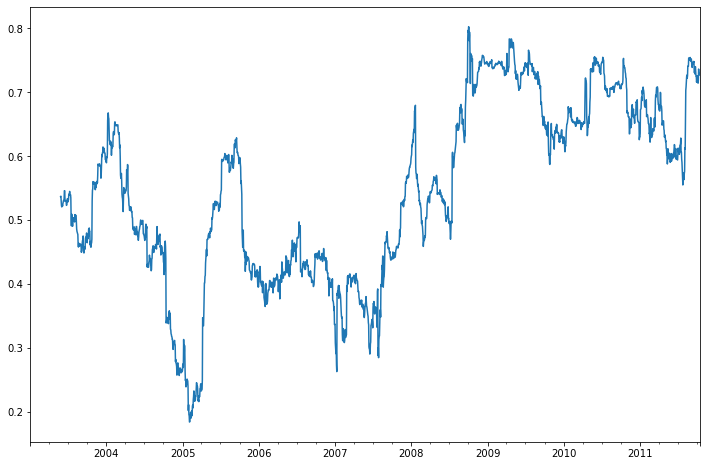

In [214]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

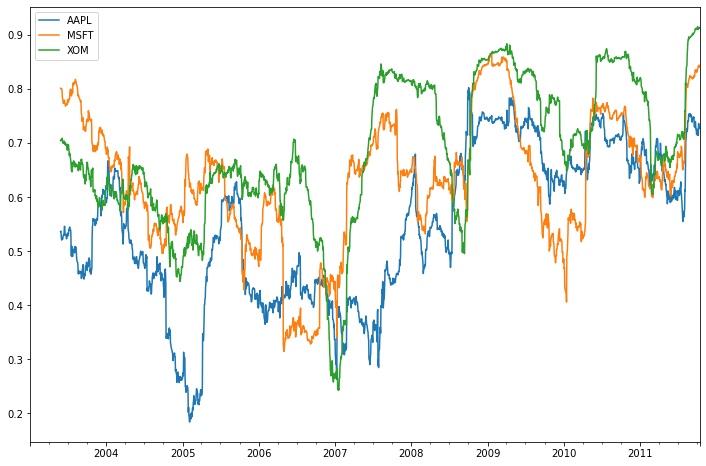

In [215]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

<AxesSubplot:>

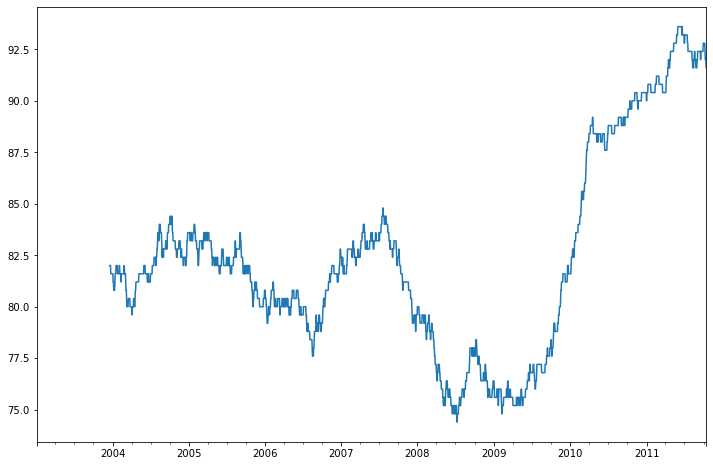

In [216]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()